### Student Name: Aidan Keeshan
### Student ID: 18200117

All necessary imports are provided. Please do not add further imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

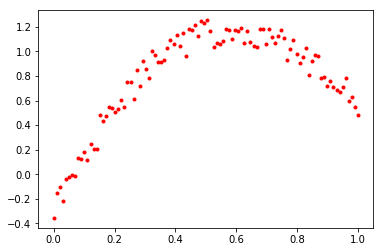

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
np.random.seed(4242) 
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
lambdas = np.logspace(-11,0,999)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9,test_size=0.1, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

ein_min_ind = np.argmin(ein)
eout_min_ind = np.argmin(eout)

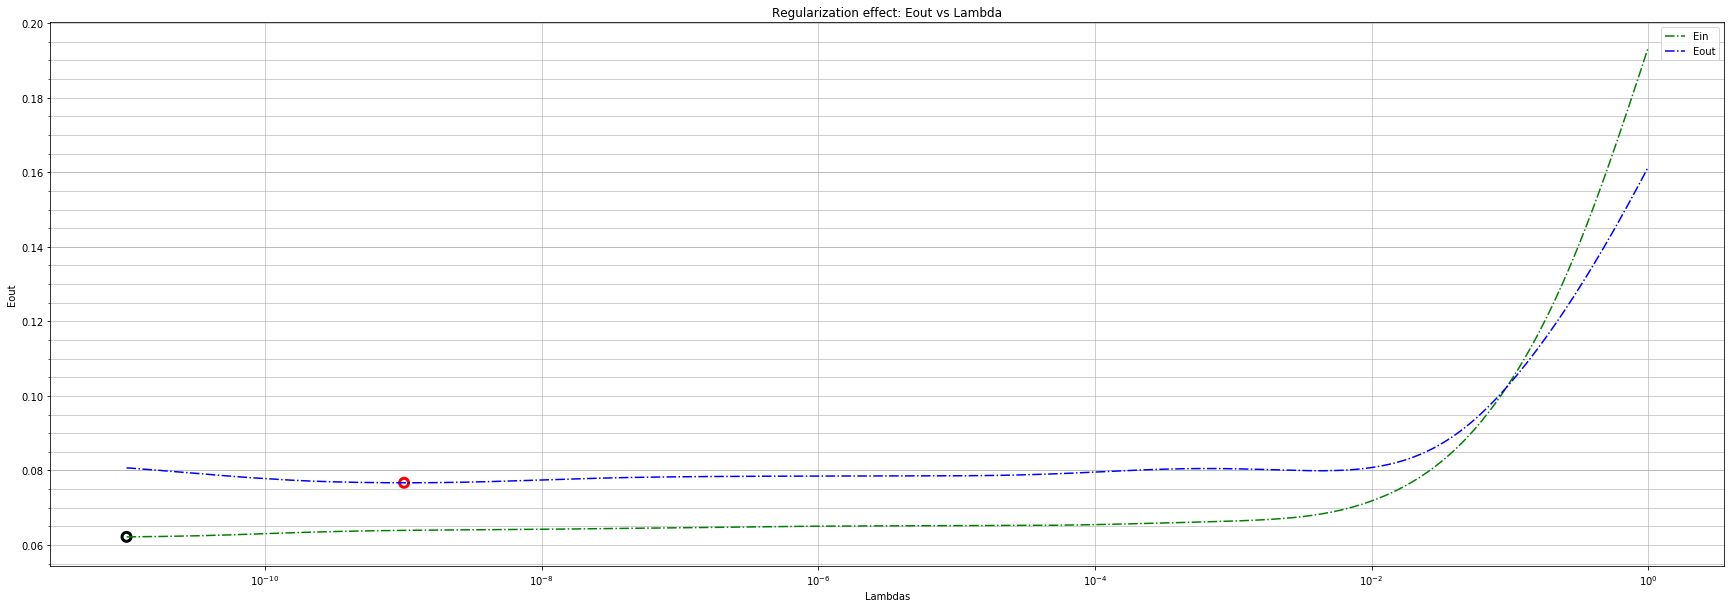

In [9]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(30,10))
plt.plot(lambdas, ein,'g',linestyle='-.',label='Ein')
plt.plot(lambdas, eout,'b',linestyle='-.',label='Eout')
plt.scatter(lambdas[eout_min_ind], eout[eout_min_ind], s=80, facecolors='none', edgecolors='red',linewidth=3,)
plt.scatter(lambdas[ein_min_ind], ein[ein_min_ind], s=80, facecolors='none', edgecolors='black',linewidth=3,)
plt.title('Regularization effect: Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.xscale('log')
plt.grid(alpha=0.75,which="both",ls="-")
plt.minorticks_on()
plt.legend()
plt.show()

Originally I had been using Eout min which would be data-snoping.  Michel had pointed this out.   
The lambda should as small as possible as per the Ein plot.  

In [10]:
def fit_data(X_train,X_test,y_train,y_test,l):
    w = weights_reg(X_train,y_train,l)
    yhat = lin_reg(w,X_trans)
    eout = calc_error(w,X_test,y_test)
    return yhat,eout

y_hat_zero,eout_zero = fit_data(X_train,X_test,y_train,y_test,0)
y_hat_ein_min,eout_ein_min = fit_data(X_train,X_test,y_train,y_test,lambdas[ein_min_ind])
y_hat_one,eout_one = fit_data(X_train,X_test,y_train,y_test,1)

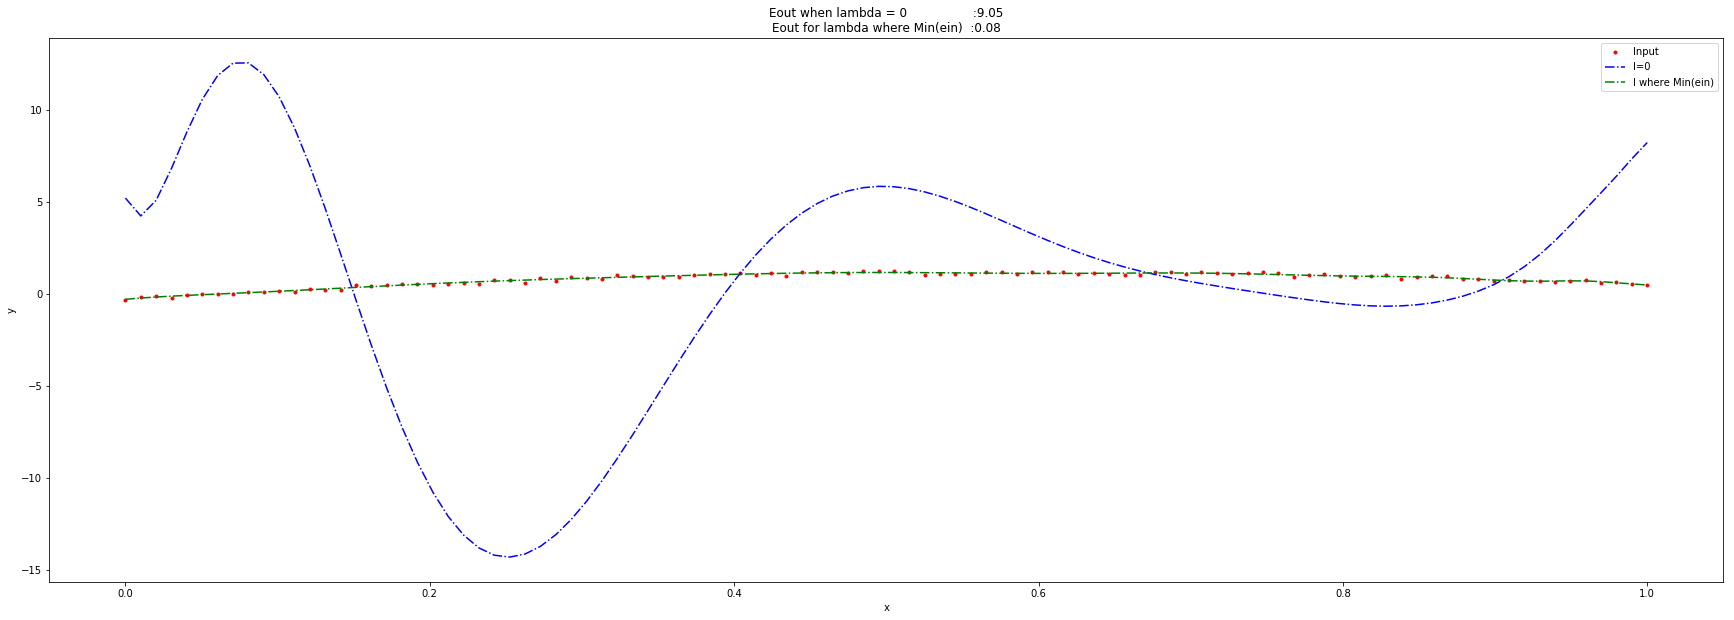

In [11]:
plt.figure(figsize=(30,10))
plt.plot(X,y,'r.',label='Input')
plt.plot(X,y_hat_zero,'b-.',label='l=0')
plt.plot(X,y_hat_ein_min,'g-.',label='l where Min(ein)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Eout when lambda = 0                 :{:.2f}\nEout for lambda where Min(ein)  :{:.2f}".format(eout_zero,eout_ein_min))
plt.show()

In [12]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))
points = 1000
domain = np.linspace(0, 20, points)
actv = (sigmoid(domain)-0.5)*2

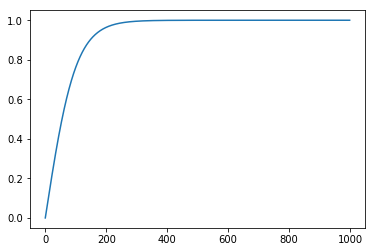

In [13]:
plt.plot(actv)
plt.show()

I have taken sigmoid function or anything which will show exponential growth over range of 0,1.   
This show the very small lambda in plot plus 0.

In [14]:
ein_domain = []
eout_domain = []

for l in actv:    
    w = weights_reg(X_train,y_train,l)
    ein_domain.append(calc_error(w,X_train,y_train))
    eout_domain.append(calc_error(w,X_test,y_test))

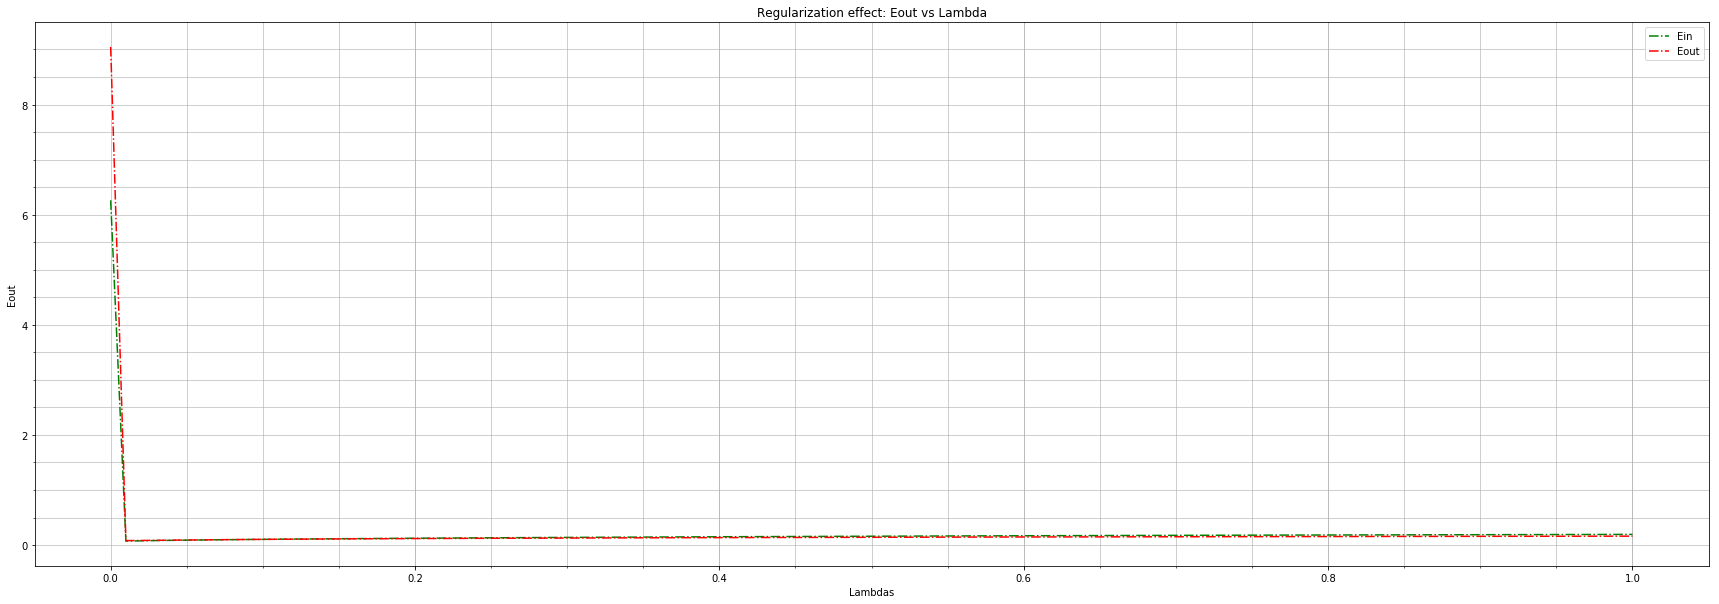

In [15]:
plt.figure(figsize=(30,10))
plt.plot(actv, ein_domain,'g',linestyle='-.',label='Ein')
plt.plot(actv, eout_domain,'r',linestyle='-.',label='Eout')
plt.title('Regularization effect: Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.grid(alpha=0.75,which="both",ls="-")
plt.minorticks_on()
plt.legend()
plt.show()

In [16]:
def subplot(y_hat,lable,title):
    plt.figure(figsize=(30,10))
    plt.plot(X,y,'r.',label='Input')
    plt.plot(X,y_hat,'b-.',label=lable)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()

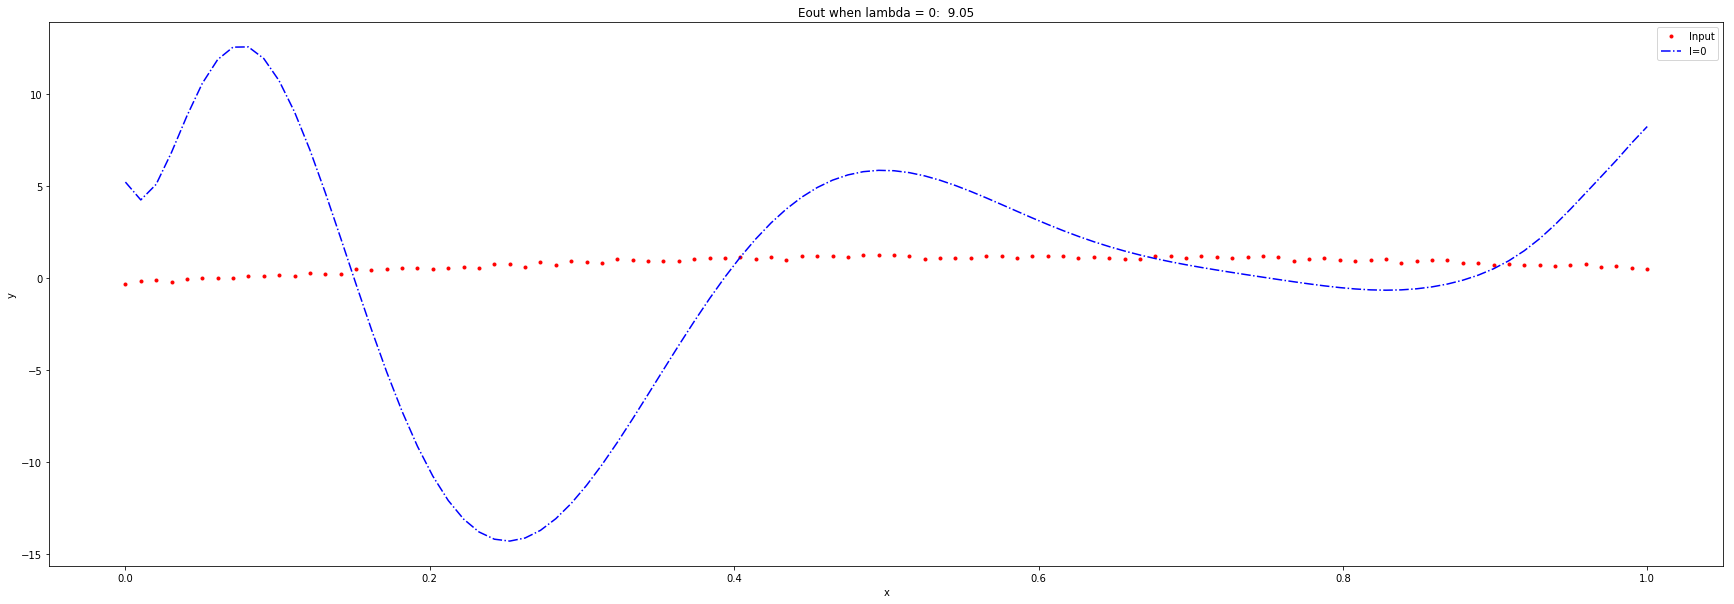

In [17]:
subplot(y_hat_zero,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_zero))

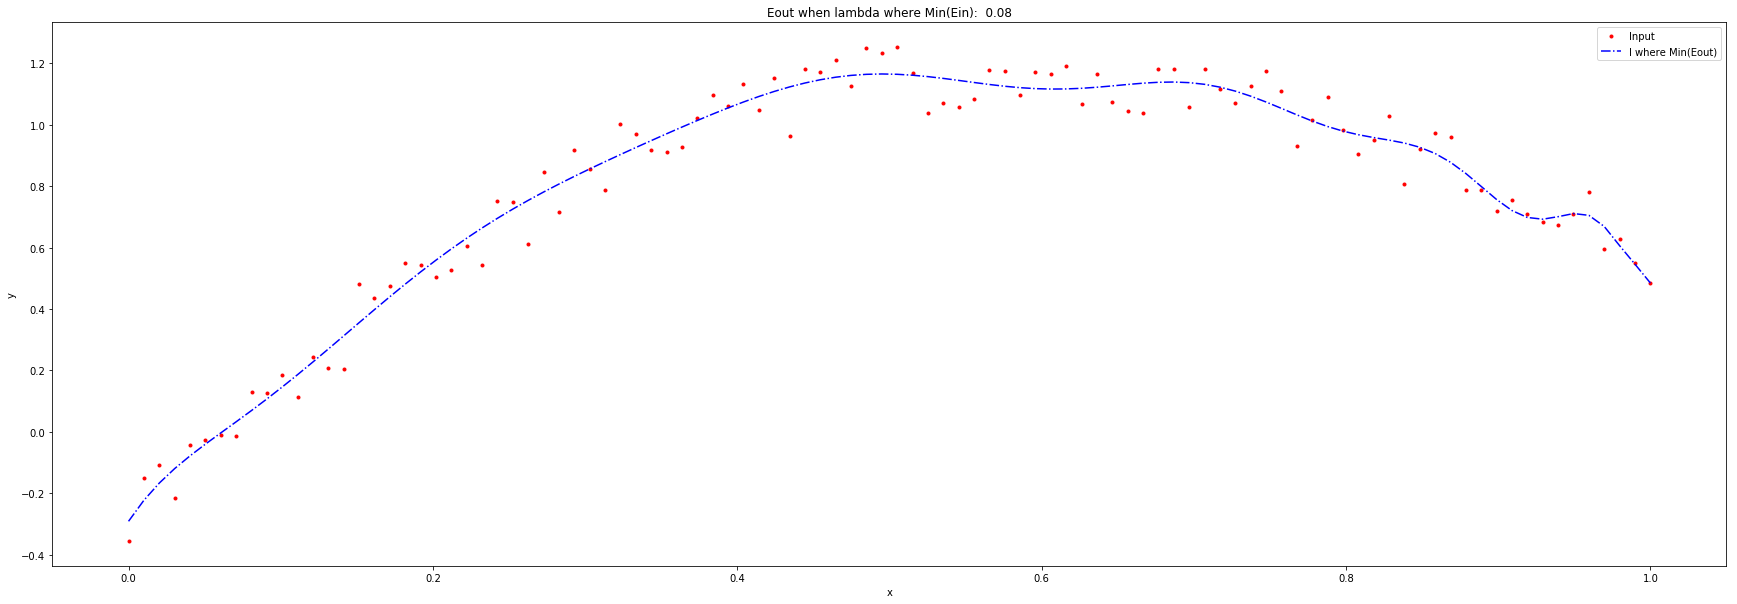

In [18]:
subplot(y_hat_ein_min,"l where Min(Eout)","Eout when lambda where Min(Ein):  {:.2f}".format(eout_ein_min))

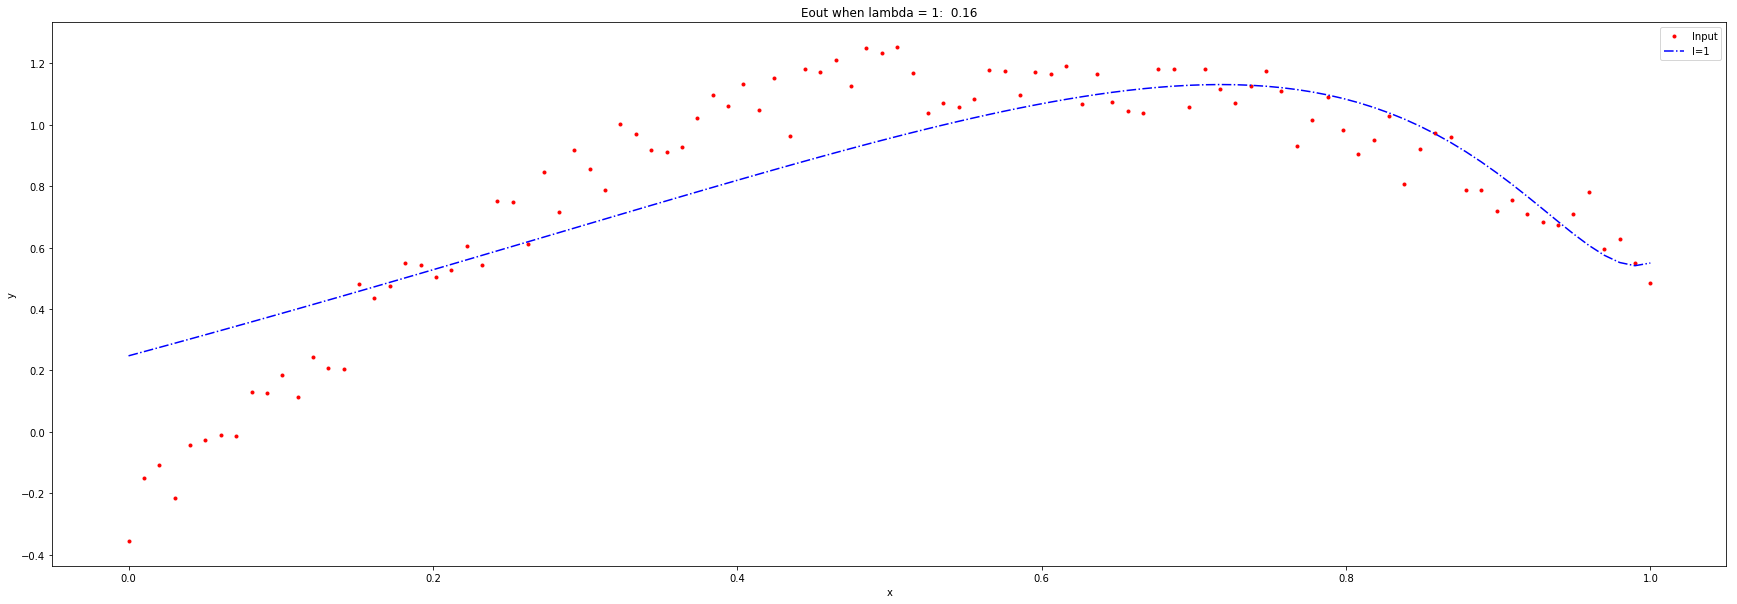

In [19]:
subplot(y_hat_one,"l=1","Eout when lambda = 1:  {:.2f}".format(eout_one))

## Task 5 (CE6002)

Use the code from Task 4 and perform the same analysis using 10-fold cross-validation.    
Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD.    
Note that the data set provided is ordered by increasing X.  

Full implementation of 10-fold CV yielding valid lambda and Eout.   

Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.   

In [20]:
ein=[]
eout=[]
weights=[]
lambdas = np.logspace(-11,0,999)
k = 10
k_fold = KFold(n_splits=k, shuffle=True, random_state=5) 


X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.8,test_size=0.2, random_state =5)

ein = np.zeros((len(lambdas),k+1))
eout = np.zeros((len(lambdas),k+1))
j = 1
for train_ind,test_ind in k_fold.split(X_train):
    kf_X_train,kf_y_train  = X_train[train_ind], y_train[train_ind]
    kf_X_test,kf_y_test = X_train[test_ind],y_train[test_ind]
    for i, l in enumerate(lambdas):
        w = weights_reg(X_train,y_train,l)
        ein[i,j] = calc_error(w,kf_X_train,kf_y_train)
        eout[i,j] = calc_error(w,kf_X_test,kf_y_test)
    j += 1


ein[:,0] = ein[:,1:10].mean(axis=1)
kf_ein_min_ind = np.argmin(ein[:,0])
kf_ein_min = ein[kf_ein_min_ind,0]

eout[:,0] = eout[:,1:10].mean(axis=1)


kf_eout_min_ind = np.argmin(eout[:,0])
kf_eout_min = ein[kf_eout_min_ind,0]

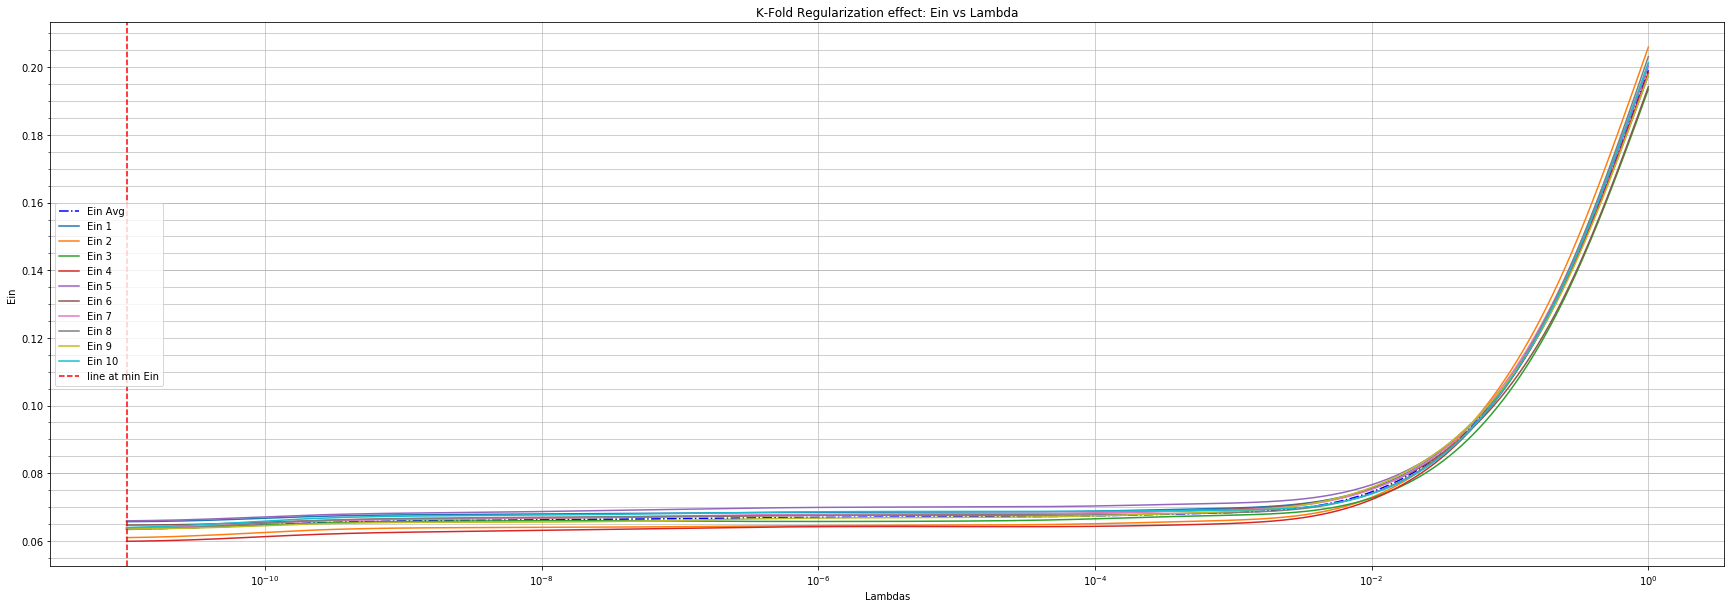

In [21]:
def plot_k_fold(typ,e_series,e_min):
    plt.figure(figsize=(30,10))
    for i in range(0,11):
        if i == 0:
            plt.plot(lambdas, e_series[:,0],'b',linestyle='-.',label=typ+' Avg')
        else:
            plt.plot(lambdas, e_series[:,i],label=typ+' '+str(i))
    plt.axvline(x=lambdas[e_min], label='line at min '+typ, c='r', ls='--', lw=1.5)
    plt.title('K-Fold Regularization effect: '+typ+' vs Lambda')
    plt.xlabel('Lambdas')
    plt.ylabel(typ)
    plt.xscale('log')
    plt.grid(alpha=0.75,which="both",ls="-")
    plt.minorticks_on()
    plt.legend(loc=6)
    plt.show()
plot_k_fold('Ein',ein,kf_ein_min_ind)

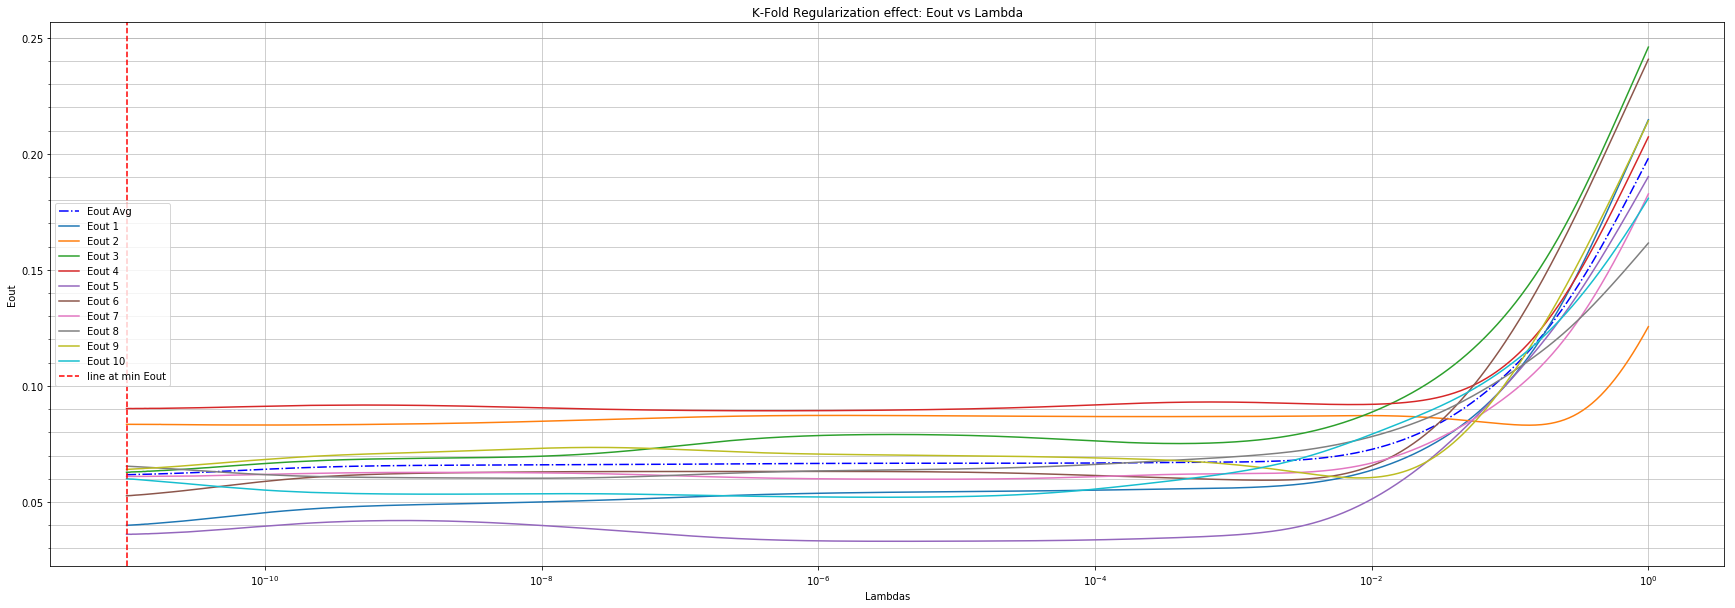

In [22]:
plot_k_fold('Eout',eout,kf_eout_min_ind)

## Conclusion
I have taken 20% validation set of the original and used K-Fold split for train test.   
Eout is calculated on the validation dataset for the performance overall.    
We can see from the K-Fold that the noise is more pronounced in the test dataset, more variance.   
While in the training set the iterations and average have much less variance. 

In [23]:
y_hat_zero,eout_zero = fit_data(X_train,X_test,y_train,y_test,0)
y_hat_ein_min,eout_ein_min = fit_data(X_train,X_test,y_train,y_test,lambdas[kf_ein_min_ind])
y_hat_one,eout_one = fit_data(X_train,X_test,y_train,y_test,1)

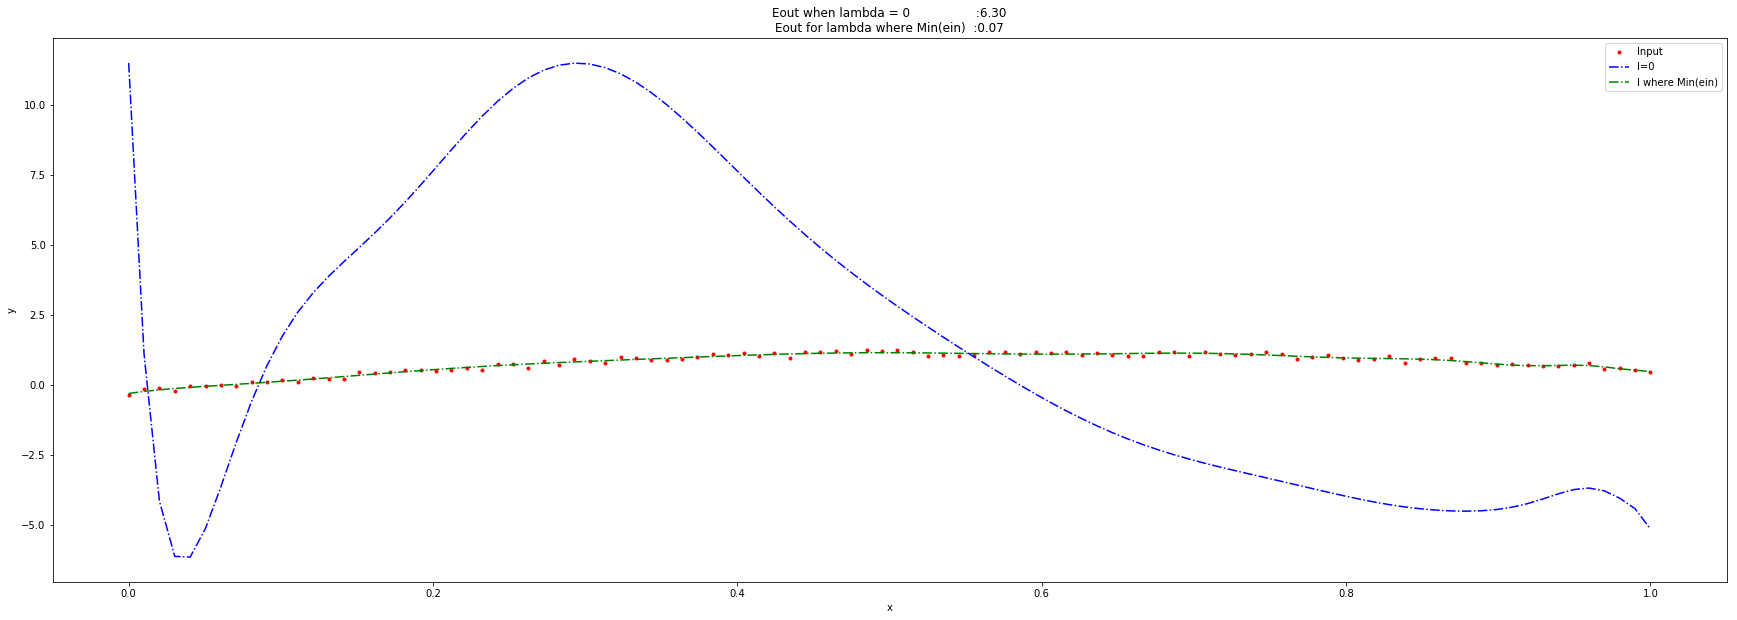

In [24]:
plt.figure(figsize=(30,10))
plt.plot(X,y,'r.',label='Input')
plt.plot(X,y_hat_zero,'b-.',label='l=0')
plt.plot(X,y_hat_ein_min,'g-.',label='l where Min(ein)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Eout when lambda = 0                 :{:.2f}\nEout for lambda where Min(ein)  :{:.2f}".format(eout_zero,eout_ein_min))
plt.show()

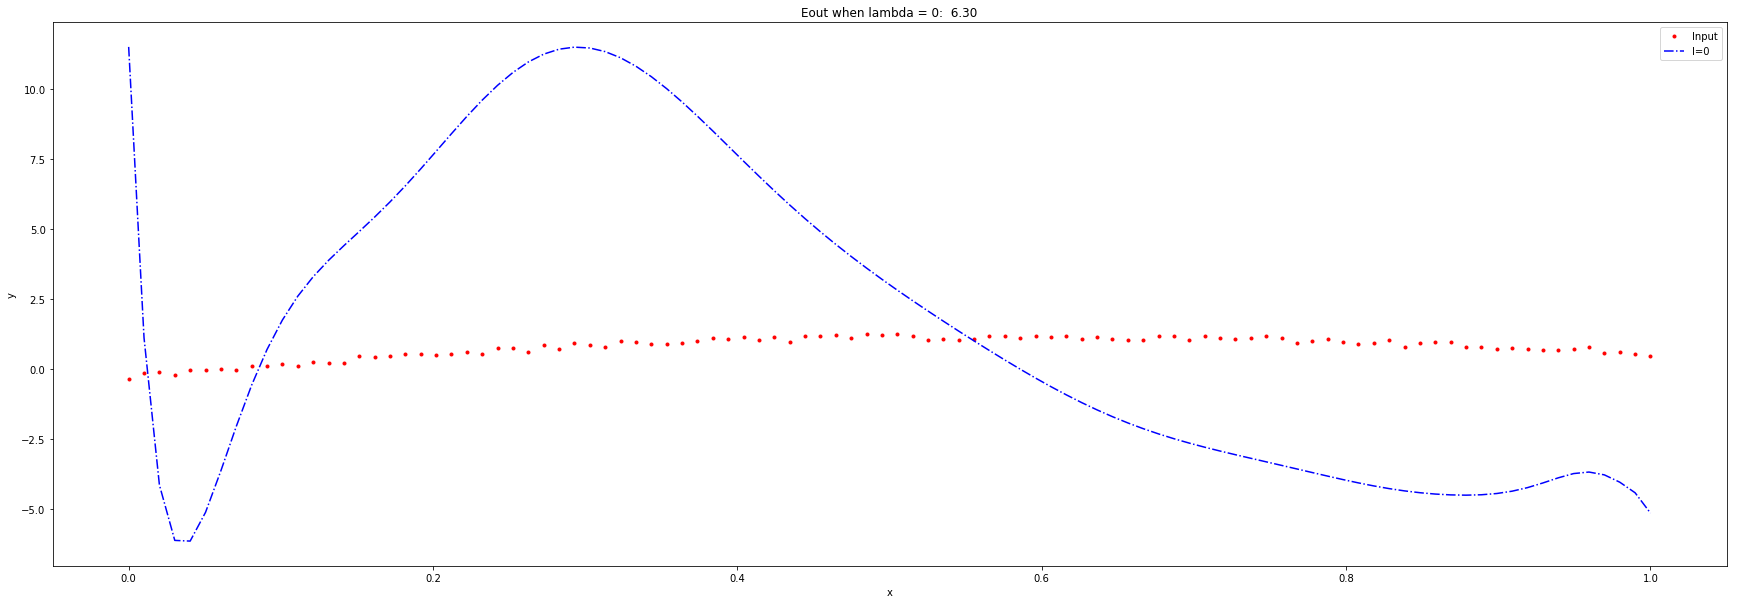

In [25]:
subplot(y_hat_zero,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_zero))

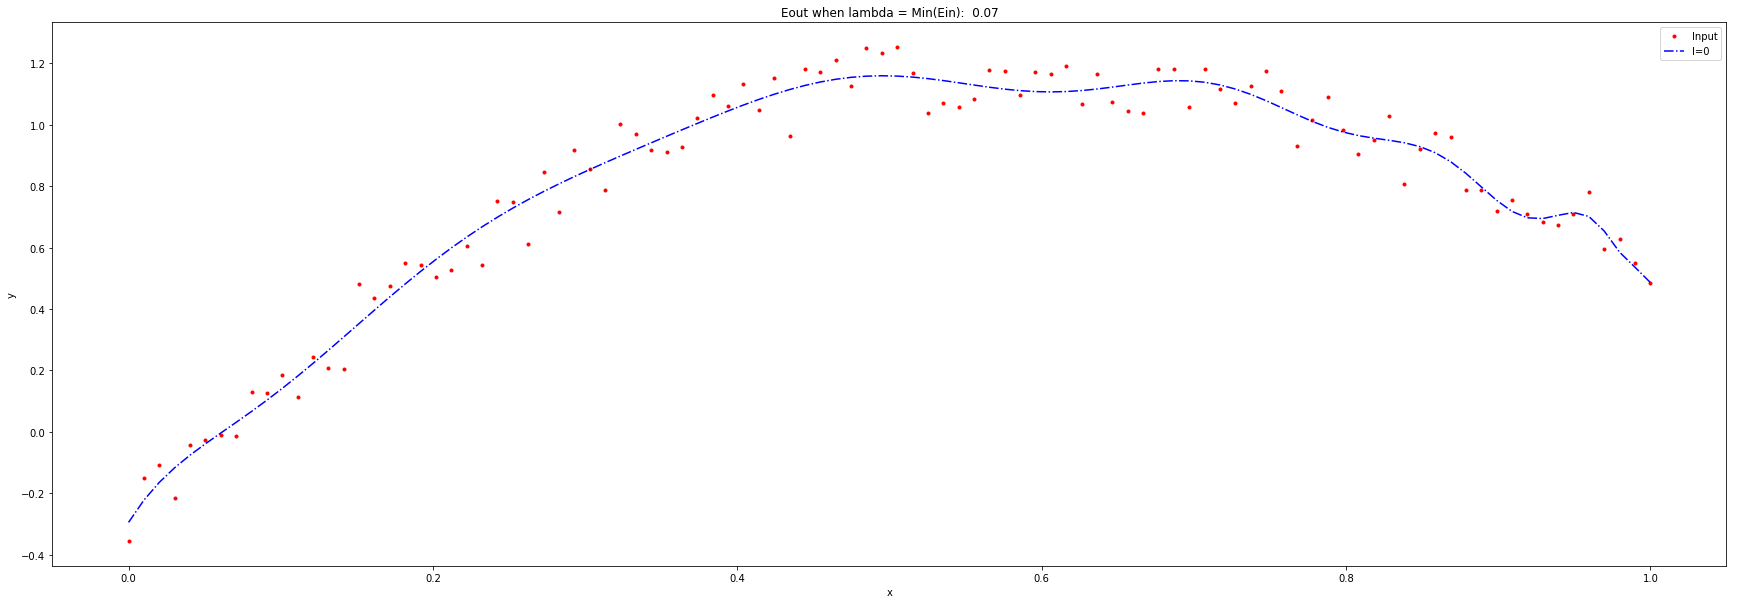

In [26]:
subplot(y_hat_ein_min,"l=0","Eout when lambda = Min(Ein):  {:.2f}".format(eout_ein_min))

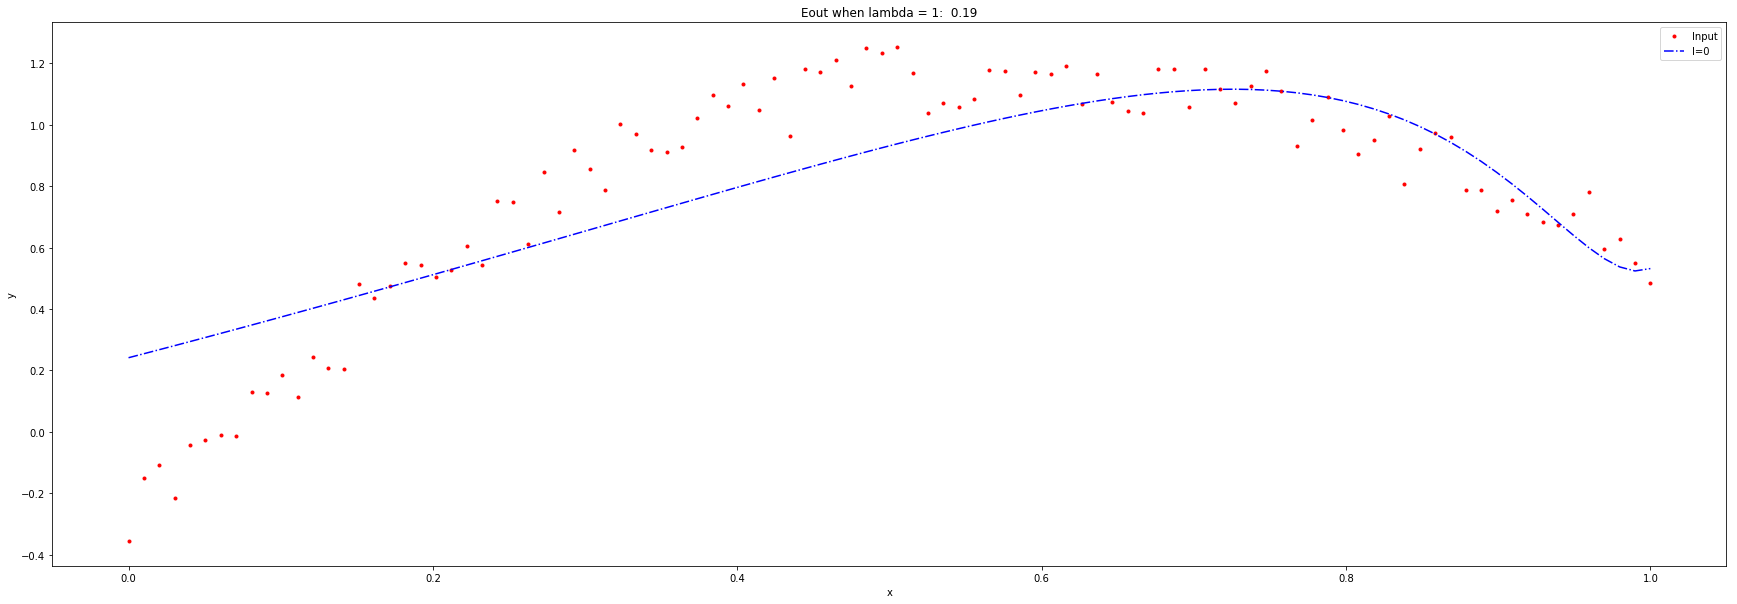

In [27]:
subplot(y_hat_one,"l=0","Eout when lambda = 1:  {:.2f}".format(eout_one))

## Task 6 (CE6002)

Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).    
    
    Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?    
    Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?    

In [28]:
def calc_error_clf(y,y_hat):
    return math.sqrt((y_hat-np.array(y)).dot(y_hat-np.array(y))/len(y))

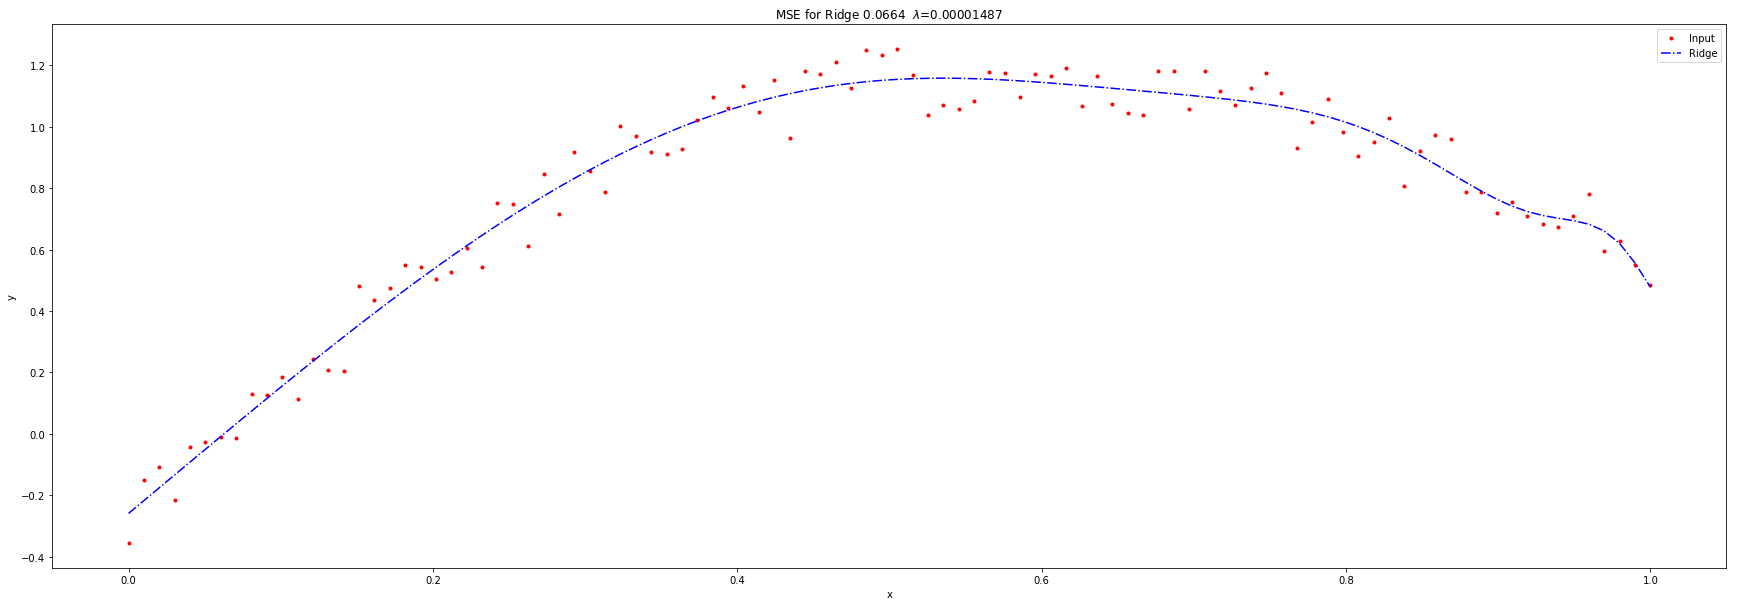

In [29]:
ridge_clf = RidgeCV(alphas=lambdas).fit(X_trans, y)
ridge_clf_yhat = ridge_clf.predict(X_trans)
ridge_clf_mse = calc_error_clf(y,ridge_clf.predict(X_trans))
subplot(ridge_clf_yhat,"Ridge","MSE for Ridge {:.4f}  $\lambda$={:.8f}".format(ridge_clf_mse,ridge_clf.alpha_))

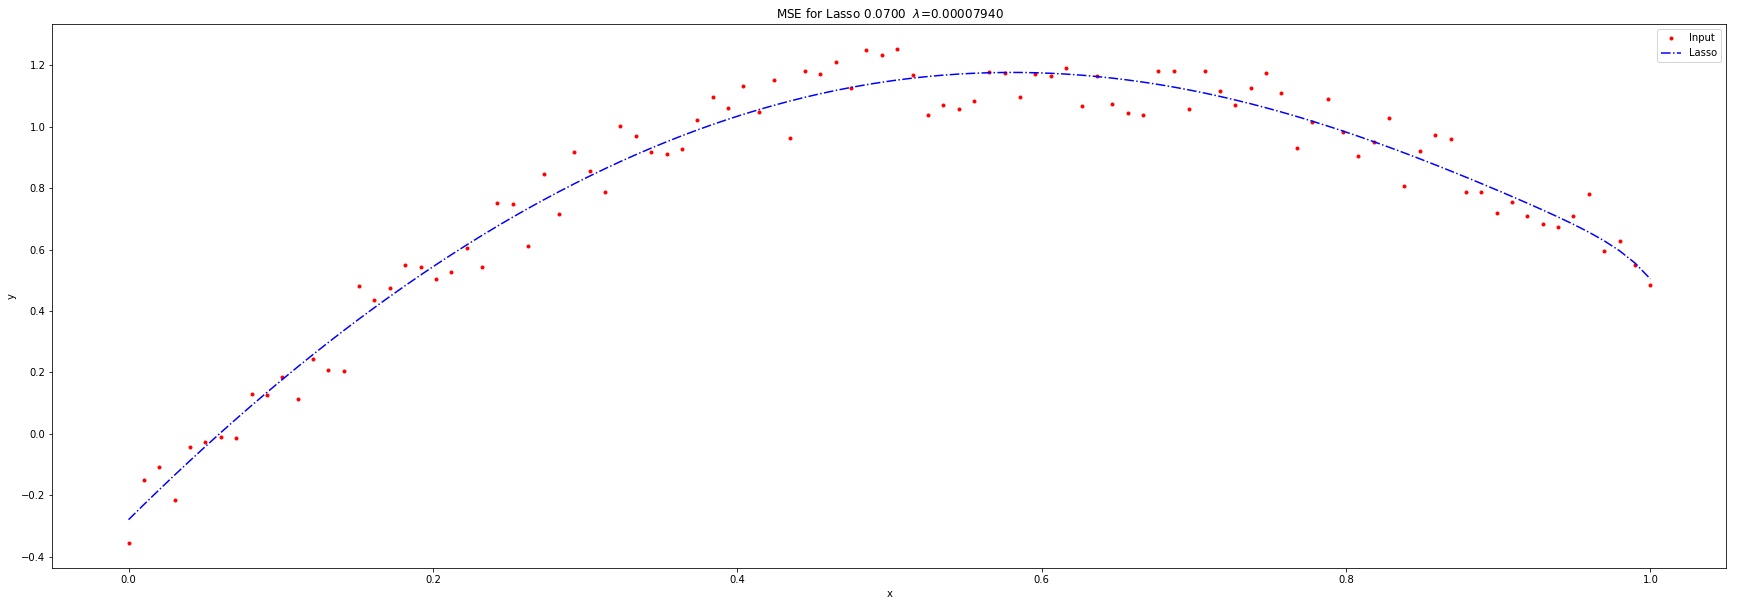

In [30]:
import warnings;
warnings.filterwarnings('ignore')

lasso_clf = LassoCV(n_alphas = len(lambdas), alphas=lambdas, cv=10, random_state=0, max_iter=10000, n_jobs=-1).fit(X_trans, y)
lasso_clf_yhat = lasso_clf.predict(X_trans)
lasso_clf_mse = calc_error_clf(y,lasso_clf.predict(X_trans))
subplot(lasso_clf_yhat,"Lasso","MSE for Lasso {:.4f}  $\lambda$={:.8f}".format(lasso_clf_mse,lasso_clf.alpha_))

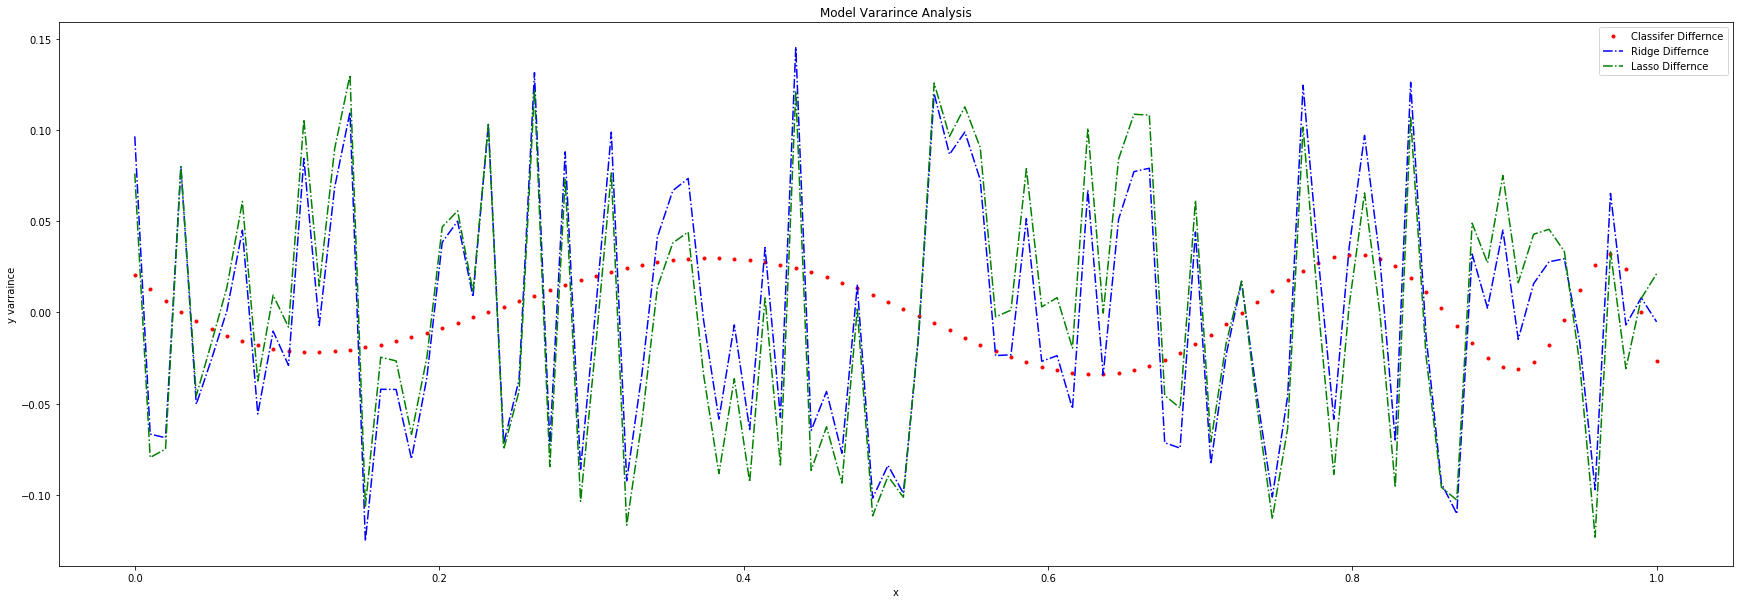

In [33]:
ridge_diff = ridge_clf_yhat - y
lasso_diff = lasso_clf_yhat - y
clf_diff = ridge_diff - lasso_diff
plt.figure(figsize=(30,10))
plt.plot(X,clf_diff,'r.',label='Classifer Differnce')
plt.plot(X,ridge_diff,'b-.',label='Ridge Differnce')
plt.plot(X,lasso_diff,'g-.',label='Lasso Differnce')
plt.xlabel('x')
plt.ylabel('y varraince')
plt.title('Model Vararince Analysis')
plt.legend()
plt.show()

#### Outcome
The plot above was to get better sense of how and when the 2 methods vary in their output.   
Ridge appears to have more dramatic swings in variance.    
Over all there seems to some sinusoidal difference between the 2. 
No conclusive insight to models here.   

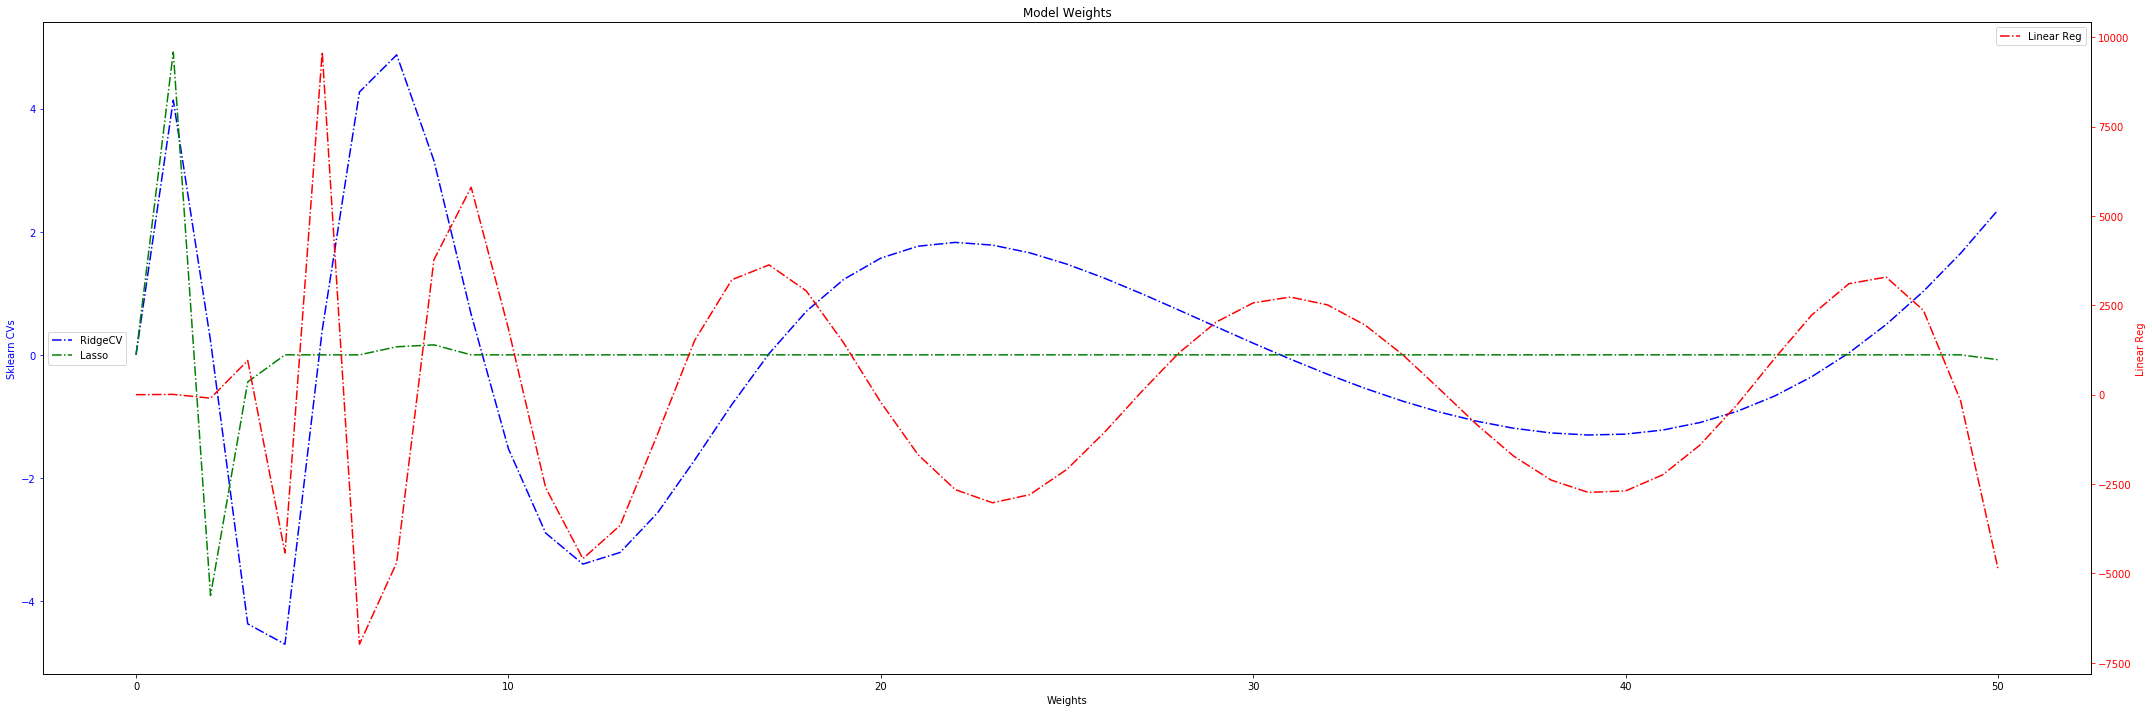

In [32]:
w = weights_reg(X_train,y_train,lambdas[kf_ein_min_ind])

fig, ax1 = plt.subplots(figsize=(30,10))
ax1.set_title("Model Weights")
ax1.plot(ridge_clf.coef_, 'b-.',label='RidgeCV')
ax1.plot(lasso_clf.coef_, 'g-.',label='Lasso')
ax1.set_xlabel('Weights')
ax1.set_ylabel('Sklearn CVs',color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc=6)

ax2 = ax1.twinx()
ax2.plot(w, 'r-.',label='Linear Reg')
ax2.set_ylabel('Linear Reg', color='r')
ax2.tick_params('y', colors='r')

ax2.legend(loc=0)

fig.tight_layout()
plt.show()

https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/   
It looks from this that what we have developed is Ridge CV in python code.    
I have plotted the weight for each method and looks to broadly aligned except we have much higher weight in the harmonics for Ridge versus our implementation.   
For lasso which only takes the ABS of beta the weight go to zero at much lower polynomial.   
The trade off here would seem to be longer training time but simpler model to productionise.   